In [42]:
from typing import List, Tuple

import numpy as np
import numpy.random as random
from numpy import ndarray
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import normalize

from abc import ABC, abstractmethod

from deep_learning.operations import (
    Operation,
    ParamOperation,
    WeightMultiply,
    BiasAdd,
    Linear,
    Sigmoid
)
from deep_learning.loss import Loss, MeanSquaredError
from deep_learning.layers import Layer, Dense
from deep_learning.neural_network import NeuralNetwork
from deep_learning.optimizer import Optimizer, SGD
from deep_learning.trainer import Trainer

In [125]:
lr = NeuralNetwork(
    layers=[
        Dense(neurons=12, activation=Sigmoid()),
        Dense(neurons=12, activation=Sigmoid()),        
        Dense(neurons=1, activation=Linear())
    ], loss=MeanSquaredError()
)

boston = load_boston()

X = boston["data"]
y = boston["target"].reshape(-1, 1)
D = np.column_stack([X, y])
df = pd.DataFrame(D, columns=list(boston["feature_names"]) + ["MDEV"])

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train = normalize(X_train, axis=0)
y_train = normalize(y_train, axis=0)

X_test = normalize(X_test, axis=0)
y_test = normalize(y_test, axis=0)

In [129]:
trainer = Trainer(lr, SGD(learning_rate=0.01))

trainer.fit(X_train, y_train.reshape(-1, 1), X_test, y_test.reshape(-1, 1), epochs=20000, eval_every=2000)

Validation loss after 2000 epochs is 0.00212976
Validation loss after 4000 epochs is 0.00151356
Validation loss after 6000 epochs is 0.00134515
Validation loss after 8000 epochs is 0.00127275
Validation loss after 10000 epochs is 0.00123741
Validation loss after 12000 epochs is 0.00122099
Validation loss after 14000 epochs is 0.00121523
Validation loss after 16000 epochs is 0.00121572
Validation loss after 18000 epochs is 0.00121996
Validation loss after 20000 epochs is 0.00122647


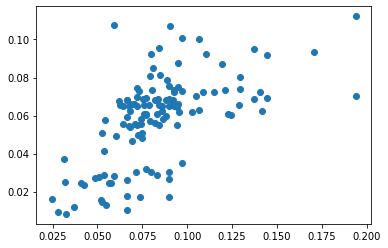

In [131]:
y_pred = lr.forward(X_test)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.show()